In [214]:
# Work split: all of us do data cleaning together
# Overview: Hoang Nguyen (location, weight class), Hoang Pham (time, gender, reach) and Hien Nguyen (stance, age)
# Analysis: Hoang Nguyen(weight), Hien Nguyen(age, height, reach, stance), Hoang Pham (age, reach)

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [216]:
path1 = 'allmatches_cleaned.csv'
path2 = 'fighters_cleaned.csv'
path3 = 'matchesmen_cleaned.csv'
path4 = 'matcheswomen_cleaned.csv'

In [217]:
allmatches = pd.read_csv(path1)
fighters = pd.read_csv(path2)
matchesmen = pd.read_csv(path3)
matcheswomen = pd.read_csv(path4)

In [218]:
# Check the info of allmatches
allmatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178 entries, 0 to 4177
Columns: 146 entries, Unnamed: 0 to R_age
dtypes: bool(1), float64(134), int64(2), object(9)
memory usage: 4.6+ MB


In [219]:
# Check the info of fighters
fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1488 non-null   int64  
 1   fighter_name  1488 non-null   object 
 2   Height        1488 non-null   object 
 3   Weight        1488 non-null   object 
 4   Reach         1488 non-null   object 
 5   Stance        1488 non-null   object 
 6   DOB           1485 non-null   object 
 7   Height_cm     1488 non-null   float64
 8   Weight_kg     1488 non-null   float64
 9   Gender        1488 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 116.4+ KB


In [220]:
# Check the info of matchesmen
matchesmen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944 entries, 0 to 3943
Columns: 146 entries, Unnamed: 0 to R_age
dtypes: bool(1), float64(134), int64(2), object(9)
memory usage: 4.4+ MB


In [221]:
# Check info of matcheswomen
matcheswomen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Columns: 146 entries, Unnamed: 0 to R_age
dtypes: bool(1), float64(134), int64(2), object(9)
memory usage: 265.4+ KB


In [222]:
# Time (Matches): sum of number of matches for each year. Suggest: line chart / bar chart

In [282]:
# Split the year and the day in the matches to get all the years alone
year = '2019-06-03'
year.split('-')[0]

allmatches['year'] = allmatches['date'].apply(lambda x: x.split('-')[0])
allmatches['year']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
4173    2000
4174    2000
4175    1999
4176    1998
4177    1997
Name: year, Length: 4178, dtype: object

In [225]:
# Get all the unique years
year_number = allmatches['year'].unique()
year_number.sort()
year_number

array(['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype=object)

In [226]:
# Count the number of day that have matches for each year
allmatches.groupby('year')['date'].count()

year
1997      1
1998      1
1999      1
2000      3
2001     10
2002     10
2003     14
2004     22
2005     44
2006     93
2007    111
2008    150
2009    171
2010    215
2011    257
2012    306
2013    365
2014    473
2015    431
2016    452
2017    418
2018    428
2019    202
Name: date, dtype: int64

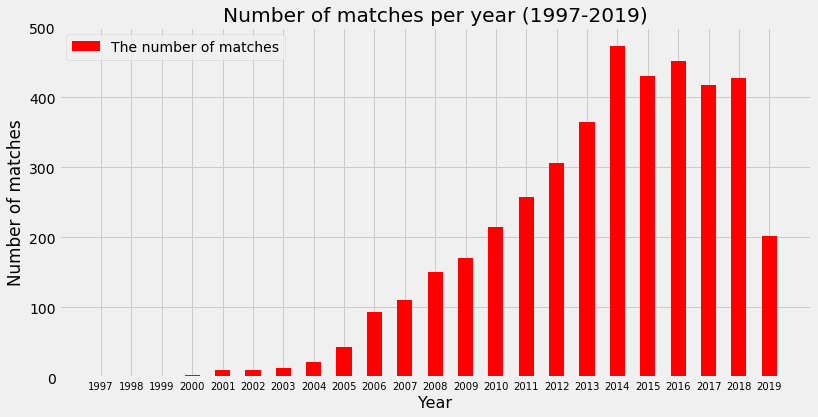

In [283]:
# Visualization:
# Draw the chart that sum all the matches for each year

plt.figure(figsize=(12, 6))

plt.bar(year_number,allmatches.groupby('year')['date'].count(),width=0.5, label = 'The number of matches',color ='r')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of matches')
plt.legend(loc = 2)
plt.title('Number of matches per year (1997-2019)')

plt.yticks(np.arange(0,600,100))
plt.xticks(fontsize=10)
plt.show()

In [228]:
# So the number of matches significant increase from 1997 after meeting their peak at 2014 they slightly decline through and stop at middle 2019 due to the covid-19

In [229]:
# Sum of matches base on the location that host the matche
allmatches['location'].unique()


array(['Chicago, Illinois, USA', 'Stockholm, Sweden',
       'Rochester, New York, USA',
       'Rio de Janeiro, Rio de Janeiro, Brazil',
       'Ottawa, Ontario, Canada', 'Sunrise, Florida, USA',
       'Saint Petersburg, Saint Petersburg, Russia',
       'Atlanta, Georgia, USA', 'Philadelphia, Pennsylvania, USA',
       'Nashville, Tennessee, USA', 'London, England, United Kingdom',
       'Wichita, Kansas, USA', 'Las Vegas, Nevada, USA',
       'Prague, Czech Republic', 'Phoenix, Arizona, USA',
       'Melbourne, Victoria, Australia', 'Fortaleza, Ceara, Brazil',
       'Brooklyn, New York, USA', 'Los Angeles, California, USA',
       'Milwaukee, Wisconsin, USA', 'Toronto, Ontario, Canada',
       'Adelaide, South Australia, Australia', 'Beijing, China',
       'Buenos Aires, Buenos Aires, Argentina', 'Denver, Colorado, USA',
       'New York City, New York, USA', 'Moncton, New Brunswick, Canada',
       'Sao Paulo, Sao Paulo, Brazil', 'Moscow, Moscow, Russia',
       'Dallas, Texas,

In [281]:
# Split the name to get unique country
name= "Chicago, Illinois, USA"
name.split(', ')[-1].split('.')[0]

allmatches['Country']= allmatches['location'].apply(lambda x: x.split(', ')[-1].split('.')[0])
country_unique= allmatches['Country'].unique()
country_unique

array(['USA', 'Sweden', 'Brazil', 'Canada', 'Russia', 'United Kingdom',
       'Czech Republic', 'Australia', 'China', 'Argentina', 'Germany',
       'Singapore', 'Chile', 'Poland', 'Japan', 'Netherlands', 'Mexico',
       'New Zealand', 'Croatia', 'South Korea', 'Ireland', 'Philippines',
       'United Arab Emirates'], dtype=object)

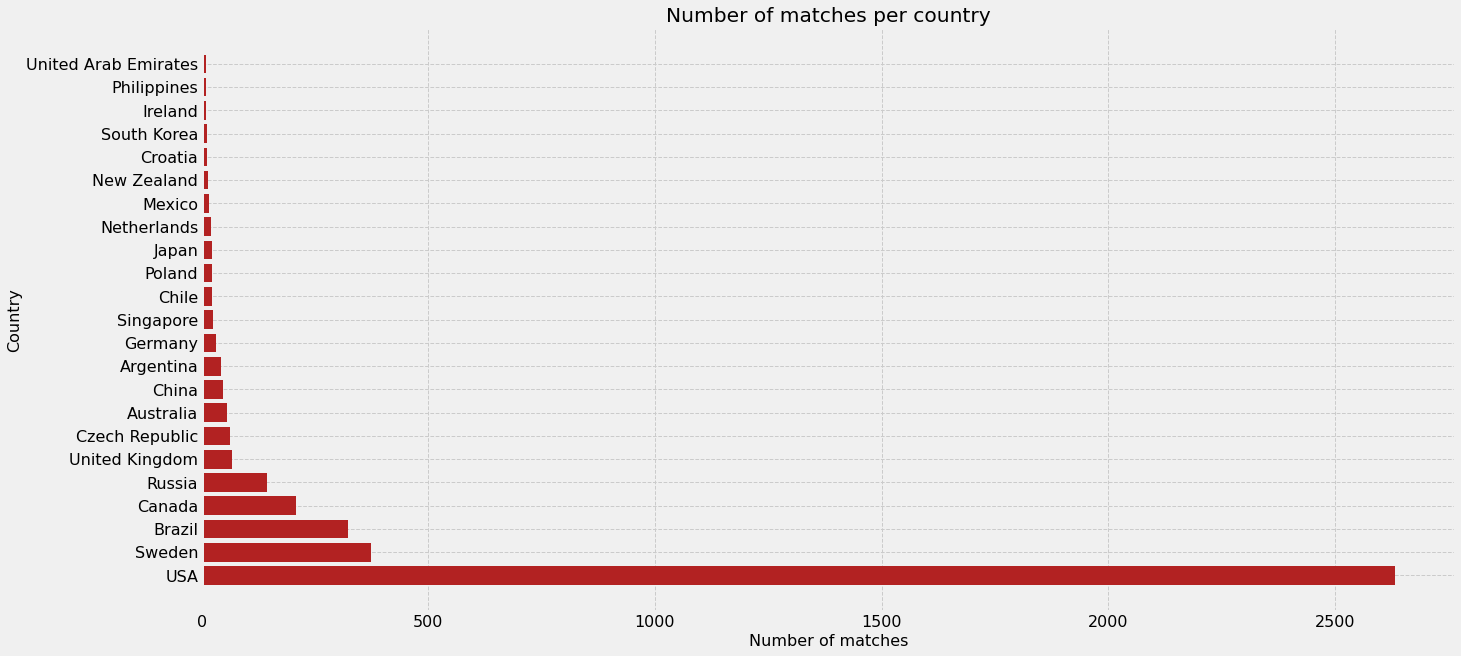

In [233]:
# Visualization:
country_draw = allmatches['Country'].value_counts()

fig, ax = plt.subplots(figsize = (20,10))
plt.barh(country_unique , country_draw, label='Matches in each country', color='firebrick')
plt.grid(linestyle='--')
plt.style.use('fivethirtyeight')
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.xlabel('Number of matches', fontsize=16)
plt.ylabel('Country', fontsize= 16)
plt.title('Number of matches per country')
plt.show()

In [234]:
# USA Sweden and Brazil is the top 3 of country that most of the matches was hosted

In [235]:
# Weight class(Matches): total weight class in UFC

In [236]:
# Bantamweight: 135 lb (61.2 kg)
# Catch Weight: can negotiate the weight to fight (ex: Bantamweight vs flyweight)
# Featherweight: 145 lb (65.8 kg)
# Flyweight: 125 lb (56.7 kg)
# Heavyweight: 265 lb (120.2 kg)
# Light Heavyweight: 205 lb (93.0 kg)
# Lightweight: 155 lb (70.3 kg)
# Middleweight: 185 lb (83.9 kg)
# Welterweight: 170 lb (77.1 kg)
# Super lightweight: 165 lb (74.8 kg)
# Women's Bantamweight: 135 lb (61.2 kg)
# Women's Featherweight: 145 lb (65.8 kg)
# Women's Flyweight: 125 lb (56.7 kg)
# Women's Strawweight: 115 lb (52.2 kg)

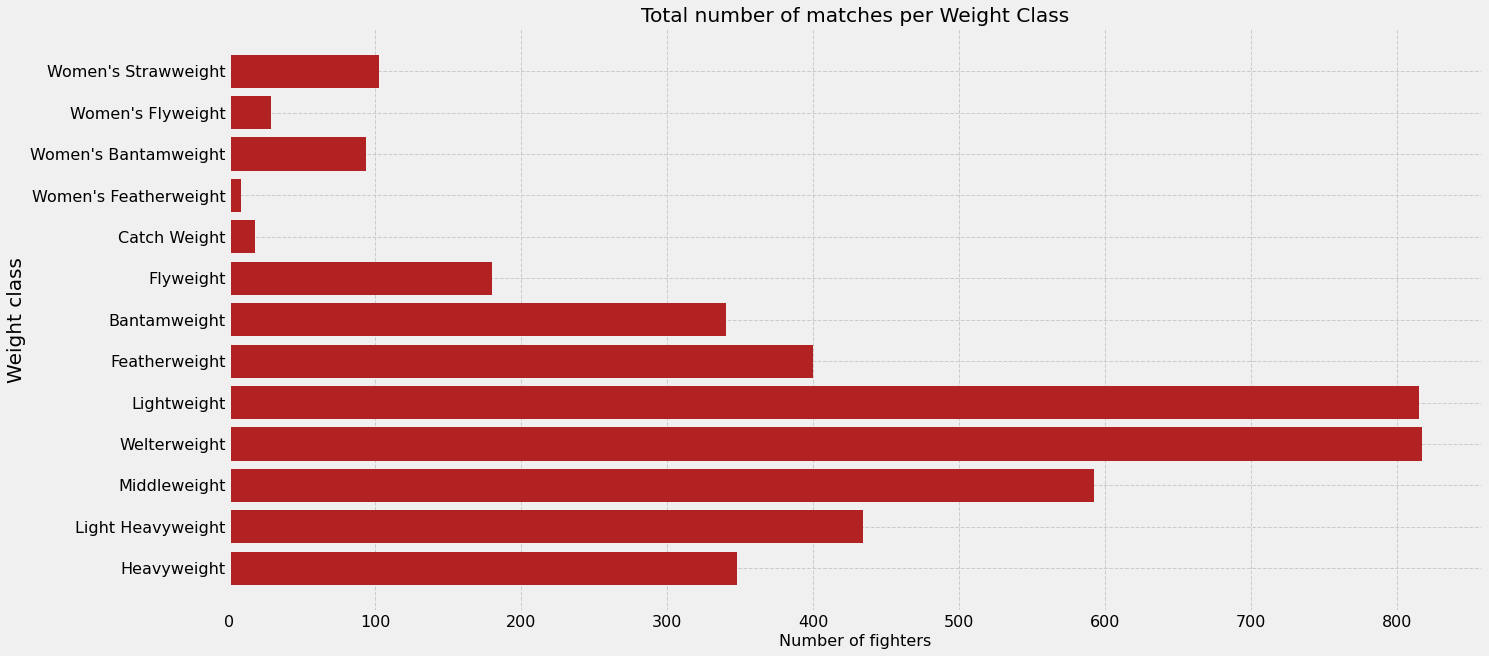

In [237]:
# Visualization:
weight_draw = allmatches['weight_class'].value_counts()
wd = weight_draw.to_frame()
wd['order']=[9,8,10,11,7,12,6,5,0,2,1,4,3]
wd2 = wd.sort_values('order', ascending=False)

fig, ax = plt.subplots(figsize = (20,10))
plt.barh(wd2.index, wd2['weight_class'], label='Sale units in number', color='firebrick')
plt.grid(linestyle='--')
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.style.use('fivethirtyeight')
plt.xlabel('Number of fighters', fontsize = 16)
plt.ylabel('Weight class', fontsize = 20)
plt.title('Total number of matches per Weight Class')
plt.show()

In [238]:
# Most of the fighter are in Bantanweight and Catch weight

In [239]:
# Gender (Matches): total matches of male and female.

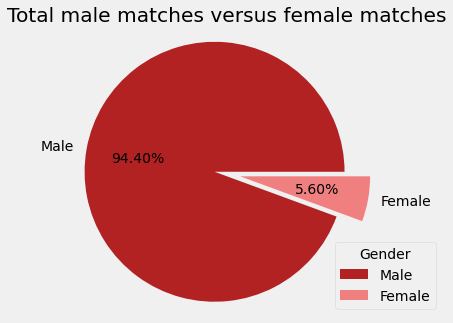

In [240]:
# Visualization:
match = [matchesmen['date'].count(),matcheswomen['date'].count()]
label = ['Male','Female']
Explode = [0, 0.2]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(match,labels = label , explode = Explode, autopct='%1.2f%%', colors = ['firebrick','lightcoral'], startangle=360)

plt.legend(loc = 'lower right', title = 'Gender')

plt.title('Total male matches versus female matches')
ax.axis('equal') 
plt.show()

In [241]:
# In the fighters table we have over 3000 fighters and only 5.6% of the fighters are female, very significant different about gender in MMA

In [242]:
# Reach - arm span (Fighters)

In [243]:
# Group all the reach by fighter's name
fighters.groupby('Reach').count()['fighter_name']

Reach
60"      3
61"      2
62"      9
63"     17
64"     32
65"     40
66"     46
67"     61
68"     93
69"     87
70"    134
71"    131
72"    156
73"    152
74"    135
75"    115
76"     88
77"     68
78"     45
79"     29
80"     22
81"     11
82"      8
83"      1
84"      3
Name: fighter_name, dtype: int64

In [244]:
# Change from foot to cm
fighters['Reach_in_foot'] = fighters['Reach'].apply(lambda x: x.split('"')[0])
fighters['Reach_in_foot']

0       70
1       69
2       78
3       73
4       73
        ..
1483    72
1484    76
1485    71
1486    77
1487    68
Name: Reach_in_foot, Length: 1488, dtype: object

In [245]:
def feet_to_cm(x):
    if len(x.split("'")) == 2:
        feet = float(x.split("'")[0])
        inches = int(x.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(x.replace('"','')) * 2.54
fighters['Reach_to_cm']= fighters['Reach_in_foot'].apply(feet_to_cm)
fighters['Reach_to_cm']

0       177.80
1       175.26
2       198.12
3       185.42
4       185.42
         ...  
1483    182.88
1484    193.04
1485    180.34
1486    195.58
1487    172.72
Name: Reach_to_cm, Length: 1488, dtype: float64

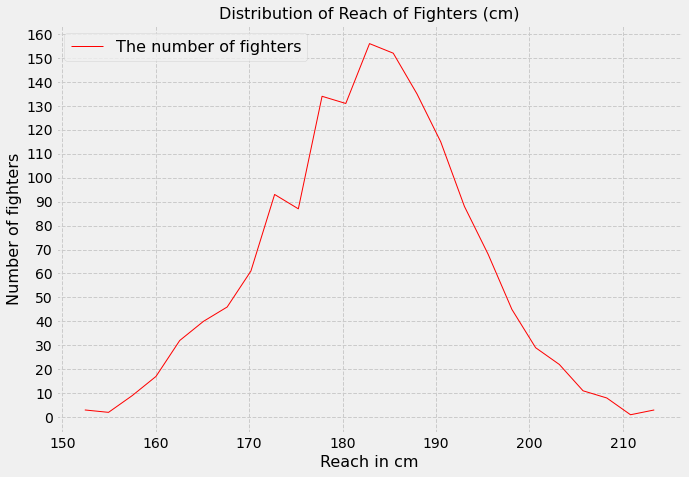

In [284]:
# Visualization:
x = fighters['Reach_to_cm'].unique()
x.sort()
y = fighters.groupby('Reach_to_cm')['fighter_name'].count()

plt.figure(figsize=(10,7))

plt.plot (x,y,label='The number of fighters', linewidth=1, color ='r')

plt.xlabel('Reach in cm', fontsize= 16)
plt.ylabel('Number of fighters', fontsize= 16)
plt.title('Distribution of Reach of Fighters (cm)', fontsize= 16)

plt.grid(linestyle = '--')

plt.yticks(np.arange(0,170,10))

plt.legend(loc='upper left', fontsize= 16)
plt.show()

In [247]:
# This if just the overview about the arm span of the fighter in UFA, we will get to the deep analyze later.

In [248]:
# Does age affect the win ratio (for men only)?

In [285]:
matches_men_age = pd.concat([matchesmen[['R_fighter', 'R_age']].rename(columns={'R_fighter':'Fighter','R_age':'Age'}),
                             matchesmen[['B_fighter', 'B_age']].rename(columns={'B_fighter':'Fighter','B_age':'Age'})])
matches_women_age = pd.concat([matcheswomen[['R_fighter', 'R_age']].rename(columns={'R_fighter':'Fighter','R_age':'Age'}),
                             matcheswomen[['B_fighter', 'B_age']].rename(columns={'B_fighter':'Fighter','B_age':'Age'})])

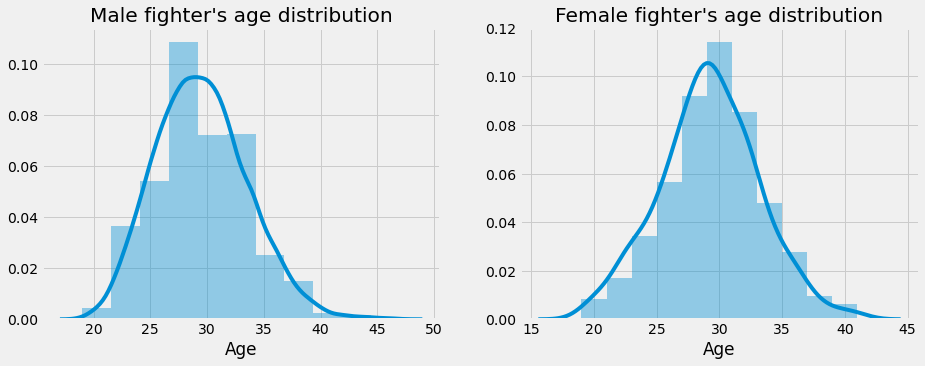

In [286]:
# Visualization:
# Which age fighters fight the most?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
sns.distplot(matches_men_age['Age'], bins=11, ax=ax1).set_title("Male fighter's age distribution")
sns.distplot(matches_women_age['Age'], bins=11, ax=ax2).set_title("Female fighter's age distribution")
plt.show()

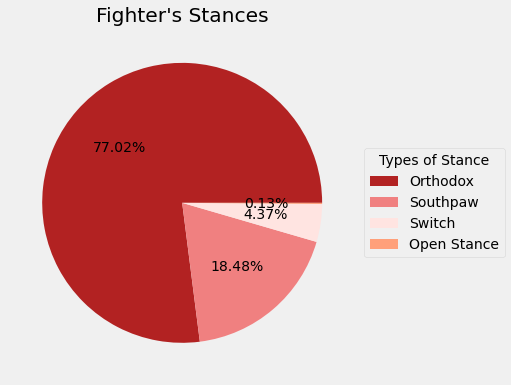

In [287]:
# Stance Overview
stance_overview = fighters['Stance'].value_counts(normalize=True)*100
fig = plt.figure(figsize=(6,6))
label = ['Orthodox', 'Southpaw', 'Switch', 'Open Stance']

plt.pie(stance_overview, startangle=360, autopct='%1.2f%%', 
        colors=['firebrick','lightcoral', 'mistyrose', 'lightsalmon'])

plt.title('Fighter\'s Stances')
plt.legend(title="Types of Stance", labels=label,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [252]:
def winner_ratio(x):
    '''
    x[0]: winner column
    x[1]: Blue is bigger
    x[2]: Red is bigger
    '''
    if x[1] > x[2] and x[0] == 'Blue':
        return True
    elif x[1] < x[2] and x[0] == 'Red':
        return True
    else:
        return False

In [253]:
# Median of age
matches_men_age['Age'].median() # result: 29

29.0

In [257]:
age_compare = matchesmen[(matchesmen['B_age'] != matchesmen['R_age']) & (matchesmen['Winner'] != 'Draw')]
age_compare['Older_win_ratio'] = age_compare[['Winner', 'B_age', 'R_age']].apply(winner_ratio, axis=1)
age = age_compare['Older_win_ratio'].value_counts(normalize=True)*100

# Both under 29
age_compare1 = matchesmen[(matchesmen['B_age'] != matchesmen['R_age']) & 
                           (matchesmen['Winner'] != 'Draw') &
                           (matchesmen['B_age'] < 29) & (matchesmen['R_age'] < 29)]
age_compare1['Older_win_ratio'] = age_compare1[['Winner', 'B_age', 'R_age']].apply(winner_ratio, axis=1)
age1 = age_compare1['Older_win_ratio'].value_counts(normalize=True)*100

# Both above 29

age_compare2 = matchesmen[(matchesmen['B_age'] != matchesmen['R_age']) & 
                           (matchesmen['Winner'] != 'Draw') &
                           (matchesmen['B_age'] >= 29) & (matchesmen['R_age'] >= 29)]
age_compare2['Older_win_ratio'] = age_compare2[['Winner', 'B_age', 'R_age']].apply(winner_ratio, axis=1)
age2 = age_compare2['Older_win_ratio'].value_counts(normalize=True)*100
age2


False    55.183673
True     44.816327
Name: Older_win_ratio, dtype: float64

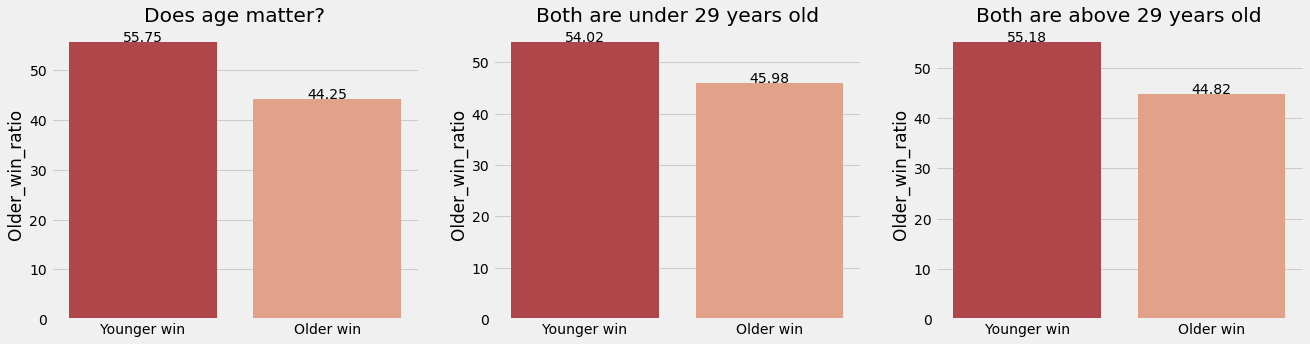

In [258]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

g = sns.barplot(x=age.index, y=age, palette=sns.color_palette("RdBu"), ax=ax1)
a = g.set_title("Does age matter?")

for index, row in age.iteritems():
    g.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Younger win", "Older win"]
g.set_xticklabels(x_labels)

# Under 29

g1 = sns.barplot(x=age1.index, y=age1, palette=sns.color_palette("RdBu"), ax=ax2)
a1 = g1.set_title("Both are under 29 years old")

for index, row in age1.iteritems():
    g1.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Younger win", "Older win"]
g1.set_xticklabels(x_labels)

# above 29

g2 = sns.barplot(x=age2.index, y=age2, palette=sns.color_palette("RdBu"), ax=ax3)
a2 = g2.set_title("Both are above 29 years old")

for index, row in age2.iteritems():
    g2.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Younger win", "Older win"]
g2.set_xticklabels(x_labels)

plt.show()

In [53]:
# The win ratio of the older fighters are always lower in each age-group. The younger one tends to win more
# 

In [259]:
# Does stance affect the ratio?
# Orthodox - right hand style
# Soutpaw - left hand style
# Switch - can use both left and right style
# Open - The feet are spaced wider with the front toe toward the opponent and the rear foot at 45 degrees (make the fighters move slower but can delivery harder punch) 

In [260]:
def orthodox_southpaw_ratio(x):
    '''
    x[0]: winner column
    x[1]: Blue 
    x[2]: Red 
    '''
    if x[1] == 'Orthodox' and x[0] == 'Blue':
        return True
    elif x[2] == 'Orthodox' and x[0] == 'Red':
        return True
    else:
        return False

# Orthodox vs Southpaw
stance_compare1 = matchesmen[(((matchesmen['B_Stance'] == 'Orthodox') & (matchesmen['R_Stance'] == 'Southpaw')) |
                           ((matchesmen['R_Stance'] == 'Orthodox') & (matchesmen['B_Stance'] == 'Southpaw'))) &
                            (matchesmen['Winner'] != 'Draw')]


stance_compare1['Orthodox_win_ratio'] = stance_compare1[['Winner', 'B_Stance', 'R_Stance']].apply(orthodox_southpaw_ratio, axis=1)
stance1 = stance_compare1['Orthodox_win_ratio'].value_counts(normalize=True)*100
stance1

False    54.441728
True     45.558272
Name: Orthodox_win_ratio, dtype: float64

In [261]:
def southpaw_switch_ratio(x):
    '''
    x[0]: winner column
    x[1]: Blue 
    x[2]: Red 
    '''
    if x[1] == 'Southpaw' and x[0] == 'Blue':
        return True
    elif x[2] == 'Southpaw' and x[0] == 'Red':
        return True
    else:
        return False

# Southpaw vs switch
stance_compare2 = matchesmen[(((matchesmen['B_Stance'] == 'Southpaw') & (matchesmen['R_Stance'] == 'Switch')) |
                           ((matchesmen['R_Stance'] == 'Southpaw') & (matchesmen['B_Stance'] == 'Switch'))) &
                            (matchesmen['Winner'] != 'Draw')]


stance_compare2['Southpaw_win_switch'] = stance_compare2[['Winner', 'B_Stance', 'R_Stance']].apply(southpaw_switch_ratio, axis=1)
stance2 = stance_compare2['Southpaw_win_switch'].value_counts(normalize=True)*100
stance2

False    55.357143
True     44.642857
Name: Southpaw_win_switch, dtype: float64

In [262]:
def orthodox_switch_ratio(x):
    '''
    x[0]: winner column
    x[1]: Blue 
    x[2]: Red 
    '''
    if x[1] == 'Orthodox' and x[0] == 'Blue':
        return True
    elif x[2] == 'Orthodox' and x[0] == 'Red':
        return True
    else:
        return False

# Southpaw vs switch
stance_compare3 = matchesmen[(((matchesmen['B_Stance'] == 'Orthodox') & (matchesmen['R_Stance'] == 'Switch')) |
                           ((matchesmen['R_Stance'] == 'Orthodox') & (matchesmen['B_Stance'] == 'Switch'))) &
                            (matchesmen['Winner'] != 'Draw')]


stance_compare3['Orthodox_win_switch'] = stance_compare3[['Winner', 'B_Stance', 'R_Stance']].apply(orthodox_switch_ratio, axis=1)
stance3 = stance_compare3['Orthodox_win_switch'].value_counts(normalize=True)*100
stance3 = stance3.sort_values(ascending=True)
stance3
# stance_compare3.groupby('Winner').count()

False    48.255814
True     51.744186
Name: Orthodox_win_switch, dtype: float64

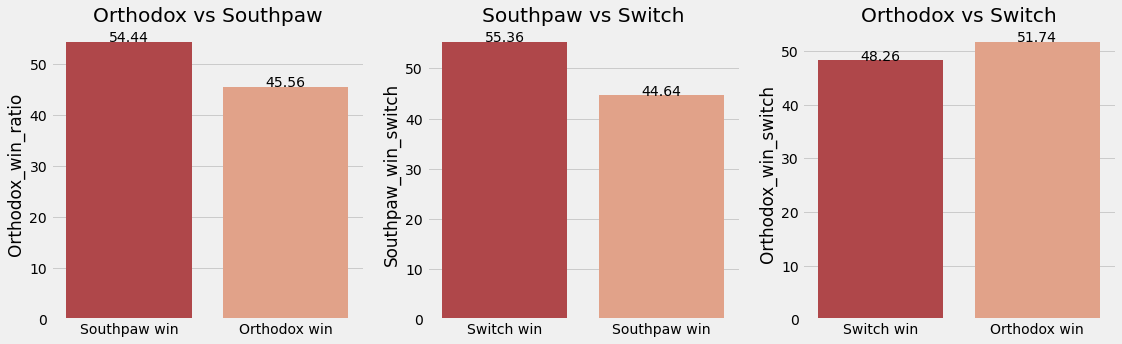

In [263]:
# Visualization:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))

# Orthodox vs Southpaw
g = sns.barplot(x=stance1.index, y=stance1, palette=sns.color_palette("RdBu"), ax=ax1)
a = g.set_title("Orthodox vs Southpaw")

for index, row in stance1.iteritems():
    g.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Southpaw win", "Orthodox win"]
g.set_xticklabels(x_labels)

# Southpaw vs Switch

g1 = sns.barplot(x=stance2.index, y=stance2, palette=sns.color_palette("RdBu"), ax=ax2)
a1 = g1.set_title("Southpaw vs Switch")

for index, row in stance2.iteritems():
    g1.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Switch win", "Southpaw win"]
g1.set_xticklabels(x_labels)

# Orthodox vs Switch

g2 = sns.barplot(x=stance3.index, y=stance3, palette=sns.color_palette("RdBu"), ax=ax3)
a2 = g2.set_title("Orthodox vs Switch")

for index, row in stance3.iteritems():
    g2.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Switch win", "Orthodox win"]
g2.set_xticklabels(x_labels)

plt.show()

In [264]:
# Stances are not affect much about the winning ratio

In [265]:
# Does weight affect the win ratio (for men only)?

In [266]:
# Change from lbs to kg:
def pound_to_kg(x):
    return round(int(x)*0.45359237, 2)
matchesmen['B_Weight_kg']= matchesmen['B_Weight_lbs'].apply(pound_to_kg)
matchesmen['R_Weight_kg']= matchesmen['R_Weight_lbs'].apply(pound_to_kg)

In [267]:
matchesmen['B_Weight_kg'].unique()

array([ 61.23,  70.31, 113.4 ,  65.77,  83.91,  92.99,  77.11, 117.93,
       120.2 , 114.76, 108.86, 112.94, 106.59,  56.7 , 119.75, 107.95,
       109.77, 111.13, 116.57, 112.04, 113.85, 119.29, 110.22, 115.67,
       109.32, 104.33, 104.78, 117.03, 102.06, 106.14,  76.2 ])

In [268]:
matchesmen['R_Weight_kg'].unique()

array([ 61.23,  70.31, 119.75,  65.77,  83.91,  92.99,  77.11, 113.4 ,
       111.13, 120.2 , 108.86, 116.57, 112.94,  56.7 , 117.93, 107.95,
       106.59, 110.22, 104.78, 112.04, 109.32, 115.67, 114.76, 119.29,
       109.77, 104.33, 117.03, 102.06,  76.2 , 106.14])

In [269]:
weight_compare = matchesmen[(matchesmen['B_Weight_kg'] != matchesmen['R_Weight_kg']) & (matchesmen['Winner'] != 'Draw')]
weight_compare['Weight_win_ratio'] = weight_compare[['Winner', 'B_Weight_kg', 'R_Weight_kg']].apply(winner_ratio, axis=1)

In [270]:
weight_compare['Weight_win_ratio'].unique()

array([False,  True])

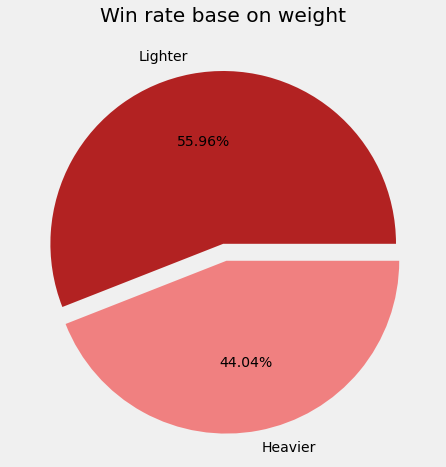

In [271]:
# Visualization:
weight= weight_compare['Weight_win_ratio'].value_counts(normalize=True)*100
label = ['Lighter','Heavier']
Explode = [0, 0.1]

fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0,0,1,1])
ax.pie(weight,labels = label , explode = Explode, autopct='%1.2f%%', colors = ['firebrick','lightcoral'], startangle=360)

plt.title('Win rate base on weight')

plt.show()

In [272]:
# Weight did affect the winning ratio, lighter fighters tend to move faster and deliver more hit compare to heavier fighters

In [273]:
# Does height affect the win ratio (for men only)?

In [274]:
# Compare height different in overall
height_compare = matchesmen[(matchesmen['B_Height_cms'] != matchesmen['R_Height_cms']) & (matchesmen['Winner'] != 'Draw')]
height_compare['Height_win_ratio'] = height_compare[['Winner', 'B_Height_cms', 'R_Height_cms']].apply(winner_ratio, axis=1)
height = height_compare['Height_win_ratio'].value_counts(normalize=True)*100



# Compare height different by 5 cms
height_compare5 = matchesmen[(abs(matchesmen['B_Height_cms'] - matchesmen['R_Height_cms']) >= 5) & 
                           (matchesmen['Winner'] != 'Draw')]

height_compare5['Height_win_ratio'] = height_compare5[['Winner', 'B_Height_cms', 'R_Height_cms']].apply(winner_ratio, axis=1)
height5 = height_compare5['Height_win_ratio'].value_counts(normalize=True)*100


# Compare height different by 10 cms
height_compare10 = matchesmen[(abs(matchesmen['B_Height_cms'] - matchesmen['R_Height_cms']) >= 10) & 
                           (matchesmen['Winner'] != 'Draw')]

height_compare10['Height_win_ratio'] = height_compare10[['Winner', 'B_Height_cms', 'R_Height_cms']].apply(winner_ratio, axis=1)
height10 = height_compare10['Height_win_ratio'].value_counts(normalize=True)*100

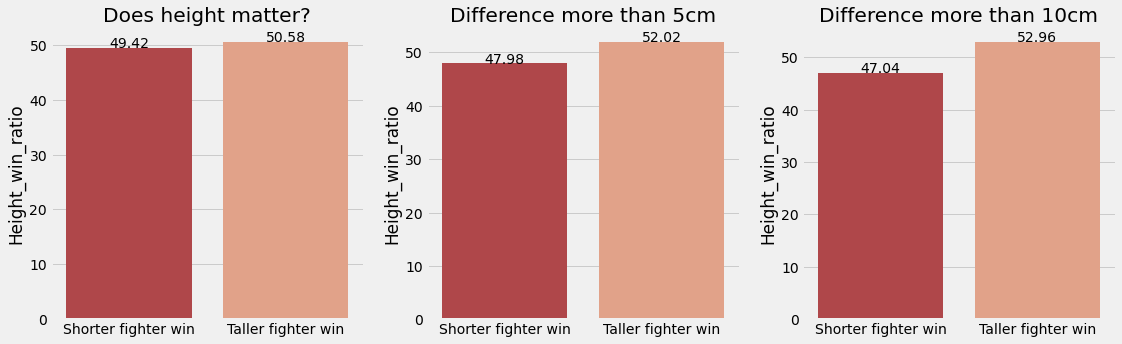

In [275]:
# Visualization:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))

# Overall

g = sns.barplot(x=height.index, y=height, palette=sns.color_palette("RdBu"), ax=ax1)
a = g.set_title("Does height matter?")

for index, row in height.iteritems():
    g.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Shorter fighter win", "Taller fighter win"]
g.set_xticklabels(x_labels)

# Difference > 5cm

g1 = sns.barplot(x=height5.index, y=height5, palette=sns.color_palette("RdBu"), ax=ax2)
a1 = g1.set_title("Difference more than 5cm")

for index, row in height5.iteritems():
    g1.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Shorter fighter win", "Taller fighter win"]
g1.set_xticklabels(x_labels)


# Difference > 10cm

g2 = sns.barplot(x=height10.index, y=height10, palette=sns.color_palette("RdBu"), ax=ax3)
a2 = g2.set_title("Difference more than 10cm")

for index, row in height10.iteritems():
    g2.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Shorter fighter win", "Taller fighter win"]
g2.set_xticklabels(x_labels)

plt.show()

In [276]:
# Height do not affect much to the winning ratio if the difference below 10cm

In [277]:
# Deep Analyze about reach:
# Does Reach actually affect the ratio of winning?

In [278]:
print(matchesmen['R_Reach_cms'].max())
print(matchesmen['R_Reach_cms'].min())
print(matchesmen['B_Reach_cms'].max())
print(matchesmen['B_Reach_cms'].min())

matches_1 = abs(matchesmen['B_Reach_cms'] - matchesmen['R_Reach_cms'])
matches_1.max()

213.36
157.48
213.36
157.48


33.01999999999998

In [279]:
# Compare reach different in overall
reach_compare = matchesmen[(matchesmen['B_Reach_cms'] != matchesmen['R_Reach_cms']) & (matchesmen['Winner'] != 'Draw')]
reach_compare['Reach_win_ratio'] = reach_compare[['Winner', 'B_Reach_cms', 'R_Reach_cms']].apply(winner_ratio, axis=1)
reach = reach_compare['Reach_win_ratio'].value_counts(normalize=True)*100



# Compare reach different by 5 cms
reach_compare5 = matchesmen[(abs(matchesmen['B_Reach_cms'] - matchesmen['R_Reach_cms']) >= 5) & 
                           (matchesmen['Winner'] != 'Draw')]

reach_compare5['Reach_win_ratio'] = reach_compare5[['Winner', 'B_Reach_cms', 'R_Reach_cms']].apply(winner_ratio, axis=1)
reach5 = reach_compare5['Reach_win_ratio'].value_counts(normalize=True)*100

# Compare reach different by 10 cms
reach_compare10 = matchesmen[(abs(matchesmen['B_Reach_cms'] - matchesmen['R_Reach_cms']) >= 10) & 
                           (matchesmen['Winner'] != 'Draw')]

reach_compare10['Reach_win_ratio'] = reach_compare10[['Winner', 'B_Reach_cms', 'R_Reach_cms']].apply(winner_ratio, axis=1)
reach10 = reach_compare10['Reach_win_ratio'].value_counts(normalize=True)*100

# Compare reach different by 20 cms
reach_compare20 = matchesmen[(abs(matchesmen['B_Reach_cms'] - matchesmen['R_Reach_cms']) >= 20) & 
                           (matchesmen['Winner'] != 'Draw')]

reach_compare20['Reach_win_ratio'] = reach_compare20[['Winner', 'B_Reach_cms', 'R_Reach_cms']].apply(winner_ratio, axis=1)
reach20 = reach_compare20['Reach_win_ratio'].value_counts(normalize=True)*100

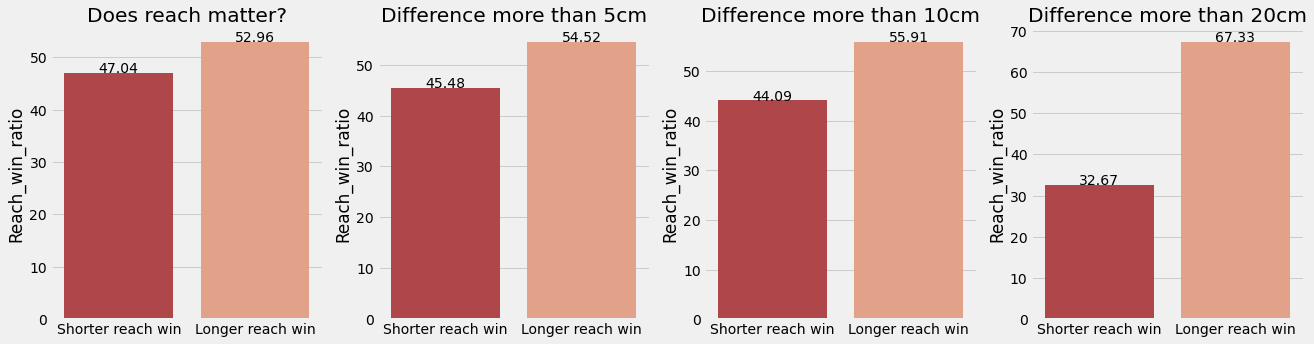

In [280]:
# Visuallization:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,5))

# Overall

g = sns.barplot(x=reach.index, y=reach, palette=sns.color_palette("RdBu"), ax=ax1)
a = g.set_title("Does reach matter?")

for index, row in reach.iteritems():
    g.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Shorter reach win", "Longer reach win"]
g.set_xticklabels(x_labels)

# Difference > 5cm

g1 = sns.barplot(x=reach5.index, y=reach5, palette=sns.color_palette("RdBu"), ax=ax2)
a1 = g1.set_title("Difference more than 5cm")

for index, row in reach5.iteritems():
    g1.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Shorter reach win", "Longer reach win"]
g1.set_xticklabels(x_labels)


# Difference > 10cm

g2 = sns.barplot(x=reach10.index, y=reach10, palette=sns.color_palette("RdBu"), ax=ax3)
a2 = g2.set_title("Difference more than 10cm")

for index, row in reach10.iteritems():
    g2.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Shorter reach win", "Longer reach win"]
g2.set_xticklabels(x_labels)

# Difference > 20cm

g3 = sns.barplot(x=reach20.index, y=reach20, palette=sns.color_palette("RdBu"), ax=ax4)
a3 = g3.set_title("Difference more than 20cm")

for index, row in reach20.iteritems():
    g3.text(index, row, round(row, 2), color='black', ha="center")
    
x_labels = ["Shorter reach win", "Longer reach win"]
g3.set_xticklabels(x_labels)

plt.show()